In [1]:
#Import Python Packages
#from google.colab import drive
#drive.mount('/content/drive/')

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
#Import all necessary librabry

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [3]:
#Read training data file
trainfile = r'/gdrive/My Drive/Dataset/SantanderTRAIN.csv'
trainData = pd.read_csv(trainfile)

#Read test data file
testfile = r'/gdrive/My Drive/Dataset/SantanderTESTWithout TARGET.csv'
testData = pd.read_csv(testfile)

trainData.head()
#print("=======")
testData.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [ ]:
print(trainData.shape)      # To get (Number of Rows, Number of Columns) of a data frame we use DataFrame.shape 
print(testData.shape)

(76020, 371)
(75818, 370)


In [ ]:
print(trainData.dtypes)   #check features and their datatypes
print(testData.dtypes)

ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
TARGET                       int64
Length: 371, dtype: object
ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace2    float64
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
Length: 370, dtype: object


In [ ]:
#Understanding the Columns

trainData.info()
print()
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75818 entries, 0 to 75817
Columns: 370 entries, ID to var38
dtypes: float64(110), int64(260)
memory usage: 214.0 MB


In [ ]:
# To check number of null values
trainData.isna().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [ ]:
# To check basic statistics of a data set, column wise
trainData.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


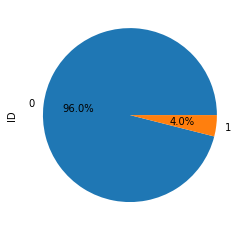

In [ ]:
#plotting pie chart for values 1 and 0 in target column
trainData.groupby("TARGET")["ID"].count().plot.pie(autopct="%.1f%%");


In [5]:
#To get list of names of all Columns from a dataframe

TrainCols = list(trainData.columns.values)
TestCols = list(testData.columns.values)
print(TrainCols)
print(TestCols)

['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var2

In [6]:
# Seperate Target column from Train Data
Xtrain = trainData[TrainCols[0:len(TrainCols)-1]].copy()
Ytrain = trainData[['TARGET']].copy()
print(Xtrain.shape)
print(Ytrain.shape)
Xtest = testData.copy()

(76020, 370)
(76020, 1)


In [7]:
# Initialising Decision Tree Algorithm and fitting the model on train set
dt = DecisionTreeClassifier(criterion='gini',splitter='random',class_weight='balanced',max_depth=10,min_samples_leaf=10,min_weight_fraction_leaf=1e-06)
#dt=
dt.fit(Xtrain, Ytrain)
#Y_Pred = dt.predict(Xtest)
#Y_Pred = pd.DataFrame(Y_Pred,columns=['TARGET'])
#Y_Pred.to_csv(index=False)
# Use this Y_Pred on Kaggle website to get accuracy result.

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=10, min_weight_fraction_leaf=1e-06,
                       splitter='random')

In [ ]:
# Basic Analysis
print("Count of 0 & 1 in TARGET column for Train Data")
print(Ytrain['TARGET'].value_counts())


Count of 0 & 1 in TARGET column for Train Data
0    73012
1     3008
Name: TARGET, dtype: int64


In [8]:
# For us to check accuracy of our algorithm, we need to predict that data set for which we have TARGET available. 
# Eg predict for Xtrain and check accuracy with TARGET that we have in order to judge our model.

X_Pred = dt.predict(Xtrain)
#Model Accuracy
print("Accuracy:", metrics.accuracy_score(Ytrain,X_Pred))

# This will always result in best score hence we are better of using TrainTestSplit, which can help us take care of 

Accuracy: 0.7245724809260721


In [9]:
# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size = .35, random_state = 1)
# Fit model on new Train Dataset
dt = dt.fit(X_train, Y_train)
#Predict the responce on new Test Dataset
Y_PredNew = dt.predict(X_test)
#Model Accuracy
print("Accuracy:", metrics.accuracy_score(Y_test,Y_PredNew))

Accuracy: 0.7703611831472921


In [10]:
# Actual VS Predicted Matrix and TP,FP,TN,FN evaluation
print(metrics.confusion_matrix(Y_test, Y_PredNew))
print()
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Y_test, Y_PredNew))

[[19819  5764]
 [  346   678]]

Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

           0       0.98      0.77      0.87     25583
           1       0.11      0.66      0.18      1024

    accuracy                           0.77     26607
   macro avg       0.54      0.72      0.52     26607
weighted avg       0.95      0.77      0.84     26607



[Text(0.42202428343949044, 0.9545454545454546, 'X[64] <= 0.356\ngini = 0.5\nsamples = 49413\nvalue = [24706.5, 24706.5]'),
 Text(0.11803343949044585, 0.8636363636363636, 'X[63] <= 0.879\ngini = 0.416\nsamples = 13234\nvalue = [6267.134, 14980.806]'),
 Text(0.027600849256900213, 0.7727272727272727, 'X[303] <= 15.295\ngini = 0.38\nsamples = 212\nvalue = [108.871, 37.359]'),
 Text(0.016985138004246284, 0.6818181818181818, 'X[80] <= 0.383\ngini = 0.202\nsamples = 187\nvalue = [96.89, 12.453]'),
 Text(0.008492569002123142, 0.5909090909090909, 'X[303] <= 1.982\ngini = 0.0\nsamples = 105\nvalue = [54.696, 0.0]'),
 Text(0.004246284501061571, 0.5, 'gini = 0.0\nsamples = 89\nvalue = [46.361, 0.0]'),
 Text(0.012738853503184714, 0.5, 'gini = 0.0\nsamples = 16\nvalue = [8.335, 0.0]'),
 Text(0.025477707006369428, 0.5909090909090909, 'X[326] <= 6.699\ngini = 0.352\nsamples = 82\nvalue = [42.194, 12.453]'),
 Text(0.021231422505307854, 0.5, 'gini = -0.0\nsamples = 55\nvalue = [28.65, 0.0]'),
 Text(0.02

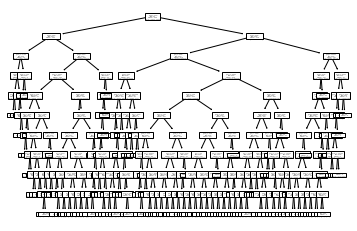

In [11]:
#Plotting the decesion Tree
tree.plot_tree(dt)
#sklearn.tree.plot_tree(decision_tree, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, impurity=True, node_ids=False, proportion=False, rotate='deprecated', rounded=False, precision=3, ax=None, fontsize=None)


In [12]:
#Get Class Prediction as a data frame with header as Prediction
PredID=testData['ID']

pred=pd.DataFrame(dt.predict(Xtest),columns=["TARGET"])
#PredID=X_test['ID']
pred.head()

pd.concat([PredID,pred],axis=1).to_csv('/gdrive/My Drive/DecisionTreeResults/sub2.csv', index = None)
pred = dt.predict(Xtest)

#Get Class Prediction probabilities as a data frame 
#Get Prediction Probability for the predicted class as a dataframe
pred_Probability =pd.DataFrame(dt.predict_proba(Xtest))

pred_Probability.head()

,0,1
0,0.568370,0.431630
1,0.568370,0.431630
2,0.848741,0.151259
3,0.568328,0.431672
4,0.848741,0.151259


In [ ]:
# Outliers plotting for each column field.
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,20))
for i in range (50):
    plt.subplot(5, 10, i+1)
    sns.boxplot(trainData.iloc[:,i])
    plt.xlabel(trainData.columns[i], size = 10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

In [ ]:
def Outliers(data, ft):
    
    IQ1 = data[ft].quantile(0.25)
    IQ3 = data[ft].quantile(0.75)
    IQR = IQ3 - IQ1
    
    lower_bound = IQ1 - 1.5 * IQR
    upper_bound = IQ3 + 1.5 * IQR
    
    index = data.index[ (data[ft] < lower_bound) | (data[ft] > upper_bound) ]
    return index

In [ ]:
index = []
for i in trainData.columns:
    index.extend(Outliers(trainData, i))
index = list(set(index))
len(index)

48895

0    73012
1     3008
Name: TARGET, dtype: int64


Text(0.5, 1.0, 'Distribution in target column before resampling')

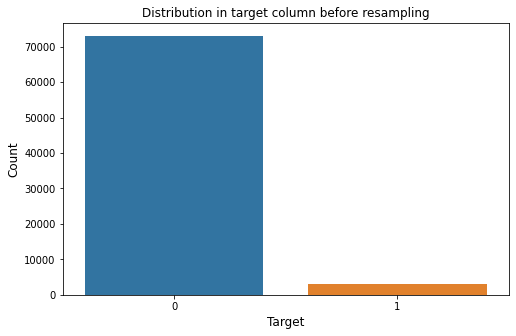

In [ ]:
print(trainData['TARGET'].value_counts())
plt.figure(figsize = (8,5))
sns.countplot(x = trainData['TARGET'])
plt.xlabel('Target', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution in target column before resampling', size = 12)

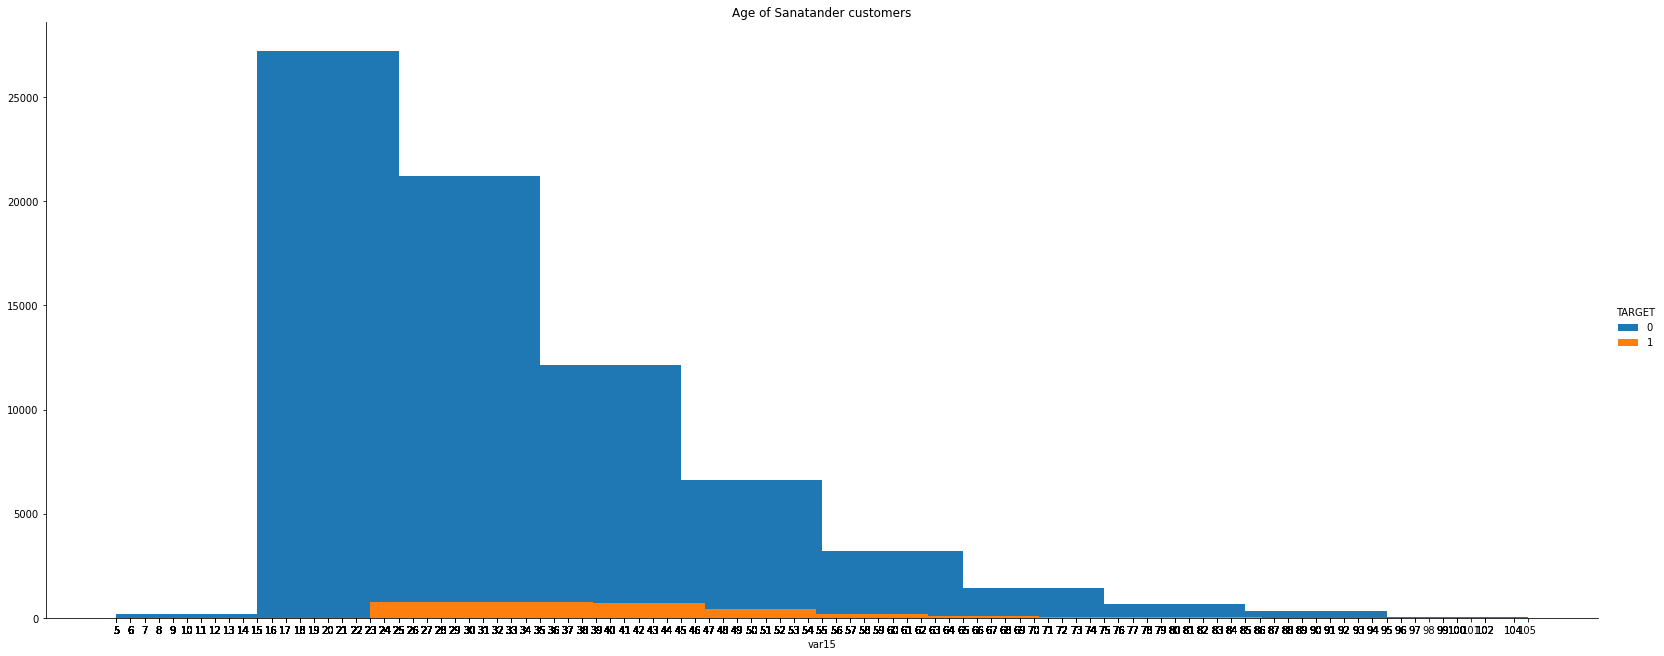

In [ ]:
#EDA
#feature1
#the feature has values ranging from 5 to 105, hence it can be assumed to be the AGE of the customers

import seaborn as sns
counts, bins = np.histogram(trainData)
g=sns.FacetGrid(trainData, hue="TARGET", height=9, aspect=2.5).map(plt.hist,"var15").add_legend()
g.set(xticks=trainData.var15)

plt.title("Age of Sanatander customers")
plt.show()

#from below histogram, we can see that 
#most of the customers below age 23 are dissatisfied
#This data can be further used to create NEW feature to identify the age of the customer is below 23 or not

In [ ]:
#Here class_weight = ‘balanced’ takes care of class imbalance. For Decision trees and Random Forest, 
#after fitting on the model with best hyper-parameters, calibrated classifier is fitted on top of these models (to get probability values).
#decision tree classifier
model=tree.DecisionTreeClassifier(class_weight='balanced')
params = {
			'max_depth':[10,100,500,1000,-1],
			'min_samples_split':[2,5,10,100,500],
			'min_samples_leaf':[1,3,5,7,10],
			'max_leaf_nodes':[100,500,1000,-1]
			}

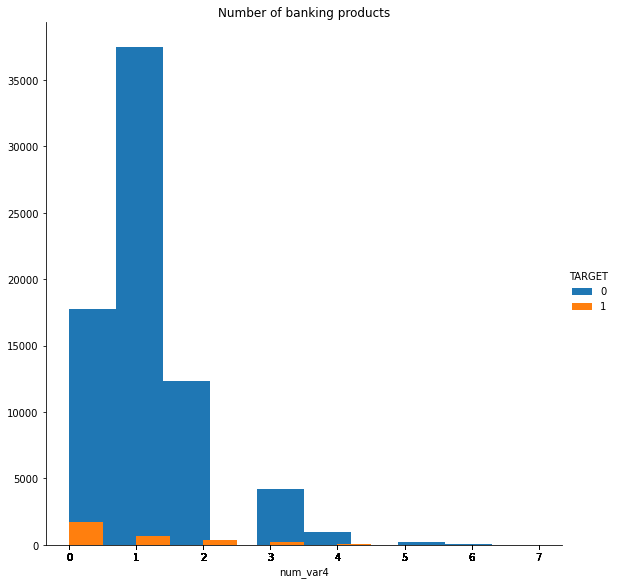

In [ ]:
#EDA
#Feature 2
#Analysing feature ‘num_var4’: ‘num_var4’ feature according to some literature is believed to be number of banking products customer 
#is having with the bank.
#num_var4 has data ranging from 0 to 9
import seaborn as sns
import matplotlib.pyplot as plt

g=sns.FacetGrid(trainData, hue="TARGET", height=8, aspect=1).map(plt.hist, "num_var4").add_legend()
g.set(xticks=trainData.num_var4)

plt.title("Number of banking products")
plt.show()

#from below graph we can observe that unsatisfied customers (target=1), do not tend to buy any banking products.

In [ ]:
trainData['num_var4'].value_counts()

In [ ]:
#banking products bought by unssatisified customers
#Number of banking products 6 and 7 didn’t make it in the series below. 
#So it is clear that customers who have 6 or more than 6 banking products with the bank are all satisfied. 
#This could be used to make a new feature while feature engineering whether value of ‘num_var4’ is 6 or more than 6.
trainData.loc[trainData['TARGET']==1]['num_var4'].value_counts()

In [ ]:
#EDA
#Feature 3
#Analysing feature ‘num_var4’: ‘num_var4’ feature according to some literature is believed to be number of banking products customer 
#is having with the bank.
#num_var4 has data ranging from 0 to 9
import seaborn as sns
import matplotlib.pyplot as plt

g=sns.FacetGrid(trainData, hue="TARGET", height=8, aspect=1).map(plt.hist, "num_var4").add_legend()
g.set(xticks=trainData.num_var4)

plt.title("Number of banking products")
plt.show()